In [1]:
!pip install pandas matplotlib seaborn scikit-learn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

In [3]:
df_raw = pd.read_csv('netflix_titles.csv')
df_raw.shape
df_raw.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df_raw = pd.read_csv('netflix_titles.csv')

In [5]:
df = df_raw[['type', 'rating', 'duration', 'listed_in', 'release_year']].copy()

In [6]:
df = df[df['type'].str.lower() == 'movie']


In [7]:
df = df[df['duration'].fillna('').str.contains('min')]

In [8]:
df.dropna(inplace=True)

In [9]:
df['duration'] = df['duration'].str.replace(' min', '').astype(int)

In [10]:
df['genre'] = df['listed_in'].apply(lambda x: x.split(',')[0])

In [11]:
df = df.drop(['type', 'listed_in'], axis=1)

In [12]:
df.head()

,rating,duration,release_year,genre
0,PG-13,90,2020,Documentaries
6,PG,91,2021,Children & Family Movies
7,TV-MA,125,1993,Dramas
9,PG-13,104,2021,Comedies
12,TV-MA,127,2021,Dramas


In [13]:
df_encoded=pd.get_dummies(df, columns=['rating', 'genre'])

In [14]:
scaler = StandardScaler()
scaler_data= scaler.fit_transform(df_encoded)

In [15]:
scaled_df = pd.DataFrame(scaler_data, columns=df_encoded.columns)

In [16]:
#NOW APPLYING K-MEANS CLUSTERNING

In [17]:
sse = []
k_range = range(2, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_df)
    sse.append(km.inertia_)


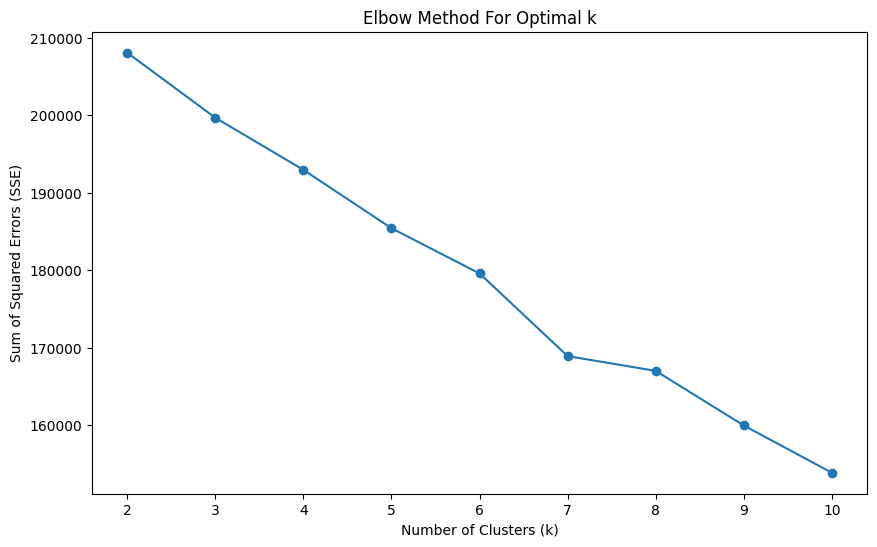

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

In [22]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_df)



In [24]:
pca=PCA(n_components=2)
pca_components=pca.fit_transform(scaled_df)

In [25]:
df['PCA1'] = pca_components[:,0]
df['PCA2'] = pca_components[:,1]

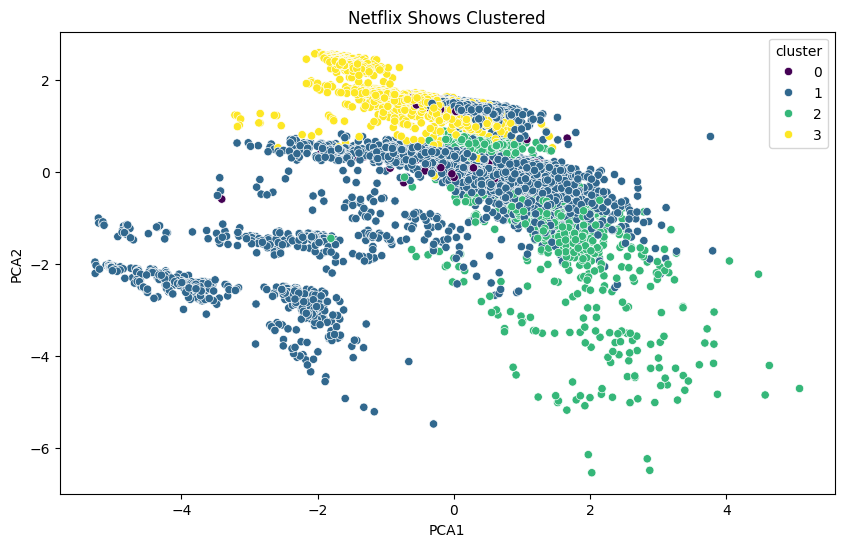

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='cluster', palette='viridis')
plt.title('Netflix Shows Clustered')
plt.show()